In [164]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [165]:
root = '../IndianPines/Best/5_1_3_True_True_full/'
files = os.listdir(root)
files.sort()
ti_c = [os.path.getctime(root + file) for file in files]
ti_m = [os.path.getmtime(root + file) for file in files]
acc_files = [file for file in files if file.endswith('accuracy.npy')]
loss_files = [file for file in files if file.endswith('losses.npy')]
accs = [np.load(root + file) for file in acc_files]
losses = [np.load(root + file) for file in loss_files]
ti_c_a = [os.path.getctime(root + file) for file in acc_files]
ti_m_a = [os.path.getmtime(root + file) for file in acc_files]
ti_c_l = [os.path.getctime(root + file) for file in loss_files]
ti_m_l = [os.path.getmtime(root + file) for file in loss_files]


In [171]:
acc_files[np.argmax(ti_c_a)]
#np.argmax(ti_c_a)
acc_files

['5_1_3_True_True_full_55.23_accuracy.npy',
 '5_1_3_True_True_full_69.39_accuracy.npy',
 '5_1_3_True_True_full_69.73_accuracy.npy',
 '5_1_3_True_True_full_70.21_accuracy.npy',
 '5_1_3_True_True_full_74.13_accuracy.npy',
 '5_1_3_True_True_full_78.08_accuracy.npy']

In [167]:
loss_files[np.argmax(ti_c_l)+1]
np.argmax(ti_c_l)

4

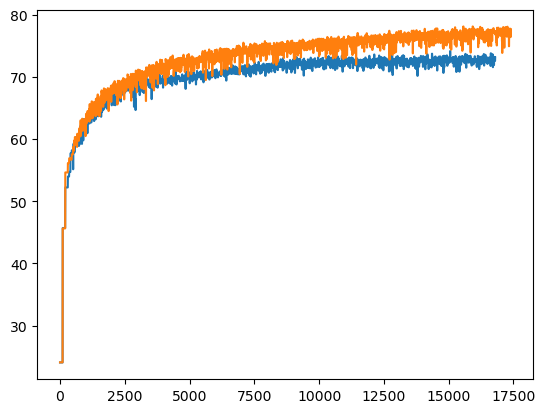

In [172]:
plt.plot(accs[np.argmax(ti_c_a)])
plt.plot(accs[-1])

#plt.plot(acc2)
#plt.plot(acc3)
#plt.plot(acc4)

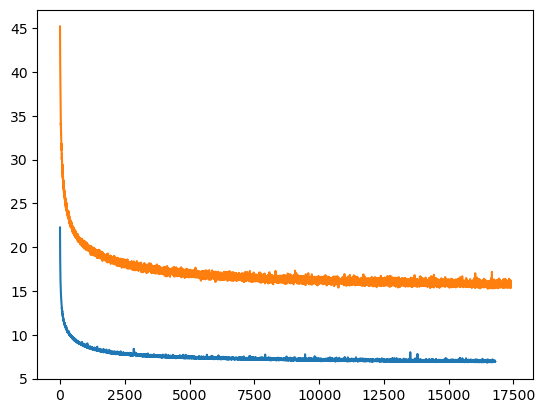

In [173]:
plt.plot(losses[np.argmax(ti_c_l)])
plt.plot(losses[-1])

In [11]:
loss1.shape

(115,)

In [12]:
acc1.shape

(115,)

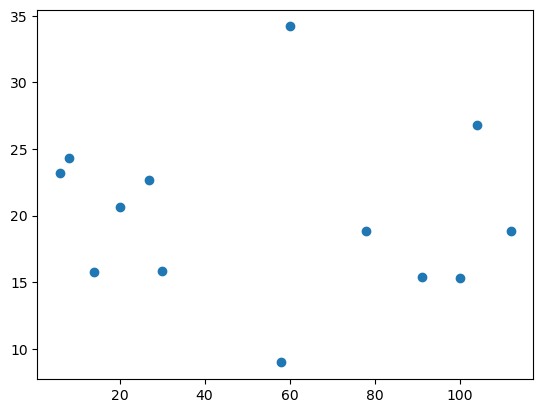

In [107]:
loss1_2 = loss1.copy()
first = None
non_nans = loss1 == loss1
first_non_nan_index = np.argmax(non_nans)
change_divisor = True
divisor = 1
for i, val in enumerate(loss1):
    next_non_nan_index = np.argmax(non_nans[i:])
    if change_divisor:
        divisor = next_non_nan_index
    #print(i)
    #print(val)
    #print(next_non_nan_index)
    #print(loss1[next_non_nan_index + i])
    if val != val:
        if i == 0:
            loss1_2[i] = loss1[first_non_nan_index]
        elif next_non_nan_index == 0:
            loss1_2[i] = loss1_2[i-1]
        else:
            loss1_2[i] = loss1_2[i-1] + (loss1[next_non_nan_index + i] - loss1_2[i-1])/divisor
        # print(loss1_2[i])
        change_divisor = False
    else:
        change_divisor = True
# plt.plot(loss1_2)
plt.scatter(np.arange(len(loss1)), loss1)

In [63]:
loss1[8:15]

array([24.32918739,         nan,         nan,         nan,         nan,
               nan, 15.75890541])

In [34]:
loss1 == loss1

array([False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False])

23.22753143310547 24.329187393188477
24.329187393188477 15.758905410766602
15.758905410766602 20.616840362548828
20.616840362548828 22.64620590209961
22.64620590209961 15.827168464660645
15.827168464660645 8.974557876586914
8.974557876586914 34.19443130493164
34.19443130493164 18.830707550048828
18.830707550048828 15.409505844116211
15.409505844116211 15.341756820678711
15.341756820678711 26.834964752197266
26.834964752197266 18.85184669494629
18.85184669494629 18.85184669494629


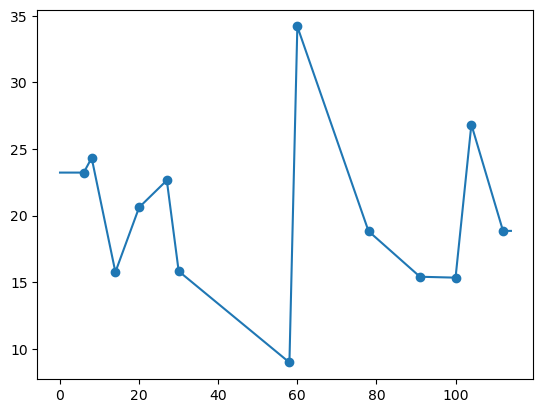

In [105]:
arr = loss1
arr2 = arr.copy()
#value1 = loss1[8:15][0]
#value2 = loss1[8:15][-1]
divisor = 1
latest_val = arr[np.argmax(arr==arr)]
next_val = latest_val
# divisor = 1
for i, val in enumerate(arr):
    if val != val:
        if i == 0:
            arr2[i] = latest_val
        else:
            arr2[i] = arr2[i - 1] + (next_val - latest_val) / divisor
    else:
        latest_val = val
        try:
            divisor = np.argmax(arr[i+1:] == arr[i+1:]) + 1
            next_val = arr[i+1:][divisor - 1]
        except:
            next_val = val
        if next_val != next_val:
            next_val = val
            divisor = 1
        print(latest_val, next_val)
plt.plot(arr2)
plt.scatter(np.arange(len(loss1)), loss1)

In [98]:
arr[np.argmax(arr==arr)]

24.329187393188477

In [80]:
latest_val

15.758905410766602

In [82]:
arr[np.argmax(arr==arr)]

24.329187393188477